In [1]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def read_file_lines(file_path):
    lines = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                lines.append(line.strip())  # Strip removes leading/trailing whitespaces and newline characters
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except IOError:
        print(f"Error: Unable to read from file '{file_path}'.")
    return lines


def count_compounds_with_cycles(dataframe):
    """
    Counts the number of compounds in a pandas DataFrame that contain at least one cycle.

    Parameters:
        dataframe (pandas.DataFrame): DataFrame containing 'SMILES' column with SMILES strings.

    Returns:
        int: Total number of compounds containing at least one cycle.
    """
    num_compounds_with_cycles = 0

    for smile in dataframe['SMILES']:
        mol = Chem.MolFromSmiles(smile)

        # Check if the molecule contains any cycles
        if mol and mol.GetRingInfo().NumRings() > 0:
            num_compounds_with_cycles += 1

    return num_compounds_with_cycles


In [16]:
chembl = pd.read_csv("../data/chembl24.tsv",sep = '\t', names = ["WLN","CHEMBLID","SMILES"])
chemspider = pd.read_csv("../data/chemspider.tsv",sep = '\t', names = ["WLN","SMILES"])
pubchem = pd.DataFrame(read_file_lines("../data/pubchem.txt"),columns=["WLN"])
book = pd.read_csv("../data/smith.tsv",names=["WLN","SMILES"])

print(f"{len(chembl)} compounds in chembl")
print(f"{len(pubchem)} compounds in pubchem")
print(f"{len(chemspider)} compounds in chemspider")
print(f"{len(book)} compounds in encoding book")

print()
pre_total = len(chembl) + len(chemspider) + len(pubchem) + len(book)
print(f"{pre_total} total compounds")

2934 compounds in chembl
6589 compounds in pubchem
15934 compounds in chemspider
422 compounds in encoding book

25879 total compounds


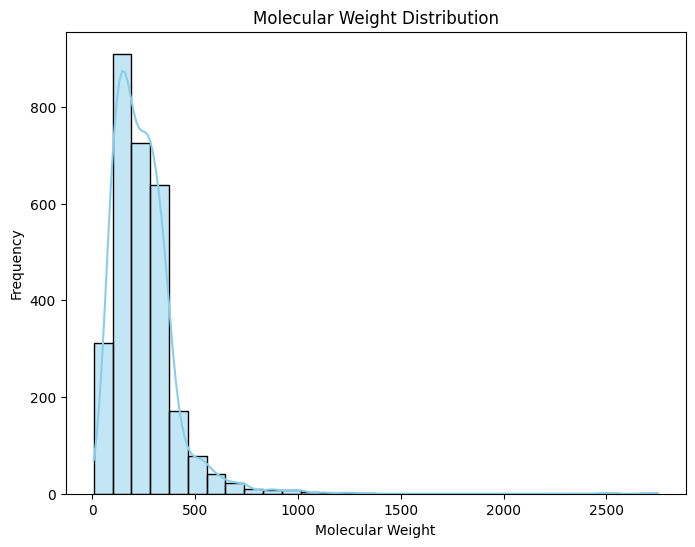

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem

def plot_molecular_weight_distribution(df, smiles_column_name):
    # Step 1: Calculate molecular weights using RDKit
    molecular_weights = []
    for smiles in df[smiles_column_name]:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            molecular_weight = rdkit.Chem.Descriptors.ExactMolWt(mol)
            molecular_weights.append(molecular_weight)

    # Step 2: Create a dataframe with the molecular weights
    weight_df = pd.DataFrame({"Molecular Weight": molecular_weights})

    # Step 3: Plot the molecular weight distribution using seaborn
    plt.figure(figsize=(8, 6))
    sns.histplot(data=weight_df, x="Molecular Weight", kde=True, bins=30, color="skyblue")
    plt.xlabel("Molecular Weight")
    plt.ylabel("Frequency")
    plt.title("Molecular Weight Distribution")
    plt.show()


plot_molecular_weight_distribution(chembl, "SMILES")